In [1]:
%matplotlib inline
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math

In [6]:
os.chdir('C:/Users/evanm_000/Desktop/Work/LendingClub')

data = pd.read_csv('loan.csv', low_memory=False)
data.drop(['id', 'member_id'], axis=1, inplace=True)

data['term'] = data['term'].str.replace(" months", "").astype(int)

data.drop(['emp_title'], axis=1, inplace=True)

import datetime as dt

data['issue_date'] = data.issue_d.apply(lambda x: dt.datetime.strptime(x,"%b-%Y"))
data.issue_date.head()

data['issue_year'], data['issue_month'] = data['issue_date'].dt.year, data['issue_date'].dt.month

data.drop(['issue_d', 'issue_date'], axis=1, inplace=True)
data['pymnt_plan'] = data['pymnt_plan'].replace(['y', 'n'], [1, 0])

data.drop(['url', 'desc', 'title', 'zip_code', 'addr_state'], axis=1, inplace=True)
data.drop(['initial_list_status'], axis=1, inplace=True)

data = data.replace('n/a', np.nan,regex=True)
data = data.replace('nan', np.nan,regex=True)

data['earliest_cr_line'] = data['earliest_cr_line'].apply(str)
data['earliest_cr_line_year'] = data['earliest_cr_line'].apply(lambda x: x[4:8])

data['earliest_cr_line_year'] = data['earliest_cr_line_year'].replace('', np.nan,regex=True)
data['earliest_cr_line_year'] = data['earliest_cr_line_year'].astype(float)

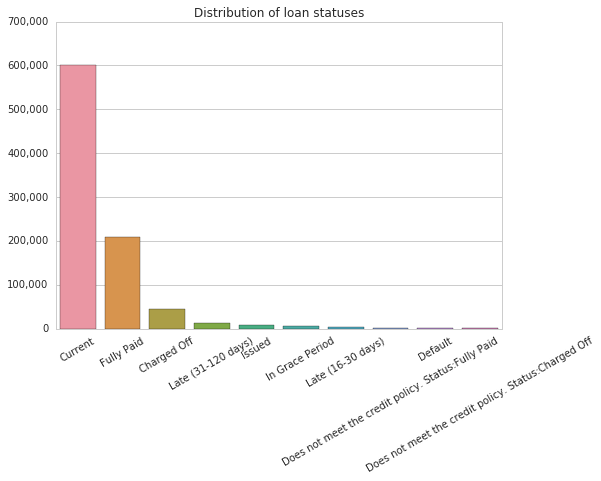

In [99]:
# Let's look at the payment status of each of the loans.
# Initially I wanted to just look at the number of people in default but that's too small of a sample size

import seaborn as sns

s = pd.value_counts(data['loan_status']).to_frame().reset_index()
s.columns = ['type', 'count']

sns.set_style("whitegrid")
ax = sns.barplot(y = "count", x = 'type', data=s)
ax.set(xlabel = '', ylabel = '', title = 'Distribution of loan statuses')
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

In [ ]:
# before looking at that I was thinking of building a model that can determine whether someone is in default or not.
# but that would be pretty silly as those in default are such a small proportion of the dataset